## NOTAS: CONFORME SE AVANZA EN EL NOTEBOOK HE MARCADO LAS CELDAS COMO NOTAS Y DUDAS.



In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [2]:
file_path = "../Resources.2/general_dataset_v3.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
0,AFG,Afghanistan,1971,1893554,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.665129,11475450,0.652,NaN,NaN
1,AFG,Afghanistan,1972,1530347,NaN,0.0,0.0,150.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.714539,11791222,-1.089,NaN,NaN
2,AFG,Afghanistan,1976,1980859,NaN,0.0,0.0,51.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.981389,12943093,-0.295,NaN,NaN
3,AFG,Afghanistan,1978,2153300,NaN,0.0,0.0,120.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.281715,13341199,0.105,NaN,NaN
4,AFG,Afghanistan,1980,1756302,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.407658,13356500,0.690,NaN,NaN


In [3]:
pak_df= df[(df['country_name'] == 'Pakistan')]
pak_df.head()

,country_code,country_name,year,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
3477,PAK,Pakistan,1973,20008479,15.301474,0.0,0.0,474.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.759498,63099404,0.126,1.581553e+10,32.458662
3478,PAK,Pakistan,1975,23187848,21.098099,0.0,14.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.901566,66816875,-0.553,1.612762e+10,30.160186
3479,PAK,Pakistan,1976,22788525,11.502460,0.0,0.0,338.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.974685,68834324,-0.250,1.684926e+10,29.408426
3480,PAK,Pakistan,1977,24319874,10.506666,0.0,0.0,848.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3.038800,70958168,0.409,1.727484e+10,29.361327
3481,PAK,Pakistan,1978,26050556,8.982346,0.0,0.0,393.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3.106739,73197254,0.012,1.776210e+10,28.676829


In [4]:
pak_df= pak_df.drop(['country_name'], axis=1)
pak_df.columns.tolist()

['country_code',
 'year',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thousands',
 'people_affected_per_100k',
 'number_of_deaths',
 'drought_count',
 'extr

In [5]:
pak_df= pak_df[(pak_df['year'] >= 1988) & (pak_df['year'] <= 2020)]
pak_df.set_index('year',inplace = True)
pak_df.head(5)

,country_code,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,people_affected_by_drought_per_100k,people_affected_by_extreme_temperatures_per_100k,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
year,,,,,,,,,,,,,,,,,,,,,
1988,PAK,57607377,9.617561,0.0,0.0,196.0,36.0,0.0,0.0,0.000000,...,0.0,1.0,1.0,0.0,2.0,3.109138,101389603,0.748,2.625180e+10,23.153323
1989,PAK,60316616,8.585048,0.0,0.0,20.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,1.0,3.033971,104512874,-0.291,2.805538e+10,23.913634
1990,PAK,67827369,6.451999,0.0,18.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,2.955562,107647918,0.426,2.890564e+10,23.067073
1991,PAK,67477105,13.492416,0.0,523.0,24.0,0.0,0.0,0.0,0.225675,...,1.0,1.0,0.0,0.0,2.0,2.866823,110778655,-0.226,3.033997e+10,22.842446
1992,PAK,72014921,10.201408,0.0,0.0,1446.0,0.0,0.0,0.0,0.000000,...,0.0,2.0,0.0,0.0,2.0,2.788444,113911126,-0.375,3.322267e+10,23.310013


In [8]:
pak_df = pak_df.drop([
 'country_code',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
 'drought_count',
 'extreme_temperatures_count',
 'floods_count',
 'storms_count',
 'wildfires_count',
 'population_population_growth_annual_percentage',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
], axis=1)
pak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   annual_co2_emissions_tons               33 non-null     int64  
 1   economic_damages_as_a_share_of_gdp      33 non-null     float64
 2   people_affected_per_100k                33 non-null     float64
 3   number_of_deaths                        33 non-null     float64
 4   total_count_disasters                   33 non-null     float64
 5   population_population_total             33 non-null     int64  
 6   temperature_change_temp_change_celsius  33 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


In [9]:
pak_df.columns.tolist()

['annual_co2_emissions_tons',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

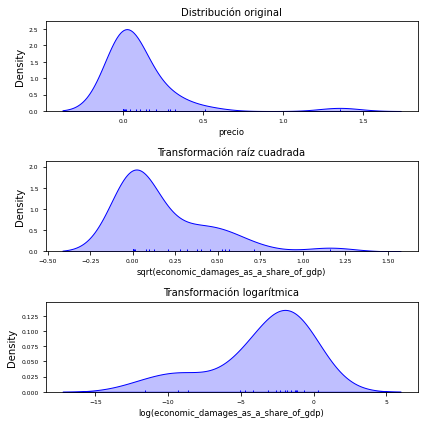

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    pak_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [11]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(pak_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,877.287374,2388.244345,122.236823,inf,0.562197,2.300506e-10
gamma,1408.634965,260.069635,134.367195,inf,0.539579,1.610246e-09
exponpow,1459.716662,363.973920,135.542695,inf,0.484838,1.148518e-07
expon,1659.460292,823.961040,136.278440,inf,0.574076,7.908193e-11
powerlaw,1675.701663,148.984239,140.096353,inf,0.546871,8.704507e-10
lognorm,1729.517739,594.406297,141.139503,inf,0.484847,1.147777e-07
chi2,1799.125635,193.154922,142.441623,inf,0.573842,8.079408e-11
logistic,2047.660630,943.553570,143.215223,inf,0.347238,4.642936e-04
norm,2131.994941,664.925964,144.547108,inf,0.335758,8.060702e-04
cauchy,2270.166164,2273.860681,146.619340,inf,0.487300,9.601146e-08


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

In [10]:
# Visualize the data using scatter plot and histogram
#sb.set_palette('colorblind')
#sb.pairplot(data=hti_df, height=3)

In [12]:
pak_df.corr ()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
annual_co2_emissions_tons,1.000000,0.082233,0.069350,0.021686,0.481603,0.967943,0.595437
economic_damages_as_a_share_of_gdp,0.082233,1.000000,0.598351,0.680708,0.023926,0.145934,0.141311
people_affected_per_100k,0.069350,0.598351,1.000000,0.436827,0.018974,0.178761,-0.089378
number_of_deaths,0.021686,0.680708,0.436827,1.000000,0.249351,0.082309,-0.069305
total_count_disasters,0.481603,0.023926,0.018974,0.249351,1.000000,0.466609,0.268266
population_population_total,0.967943,0.145934,0.178761,0.082309,0.466609,1.000000,0.581714
temperature_change_temp_change_celsius,0.595437,0.141311,-0.089378,-0.069305,0.268266,0.581714,1.000000


In [13]:
pak_corr_df = pak_df.corr(method='spearman')

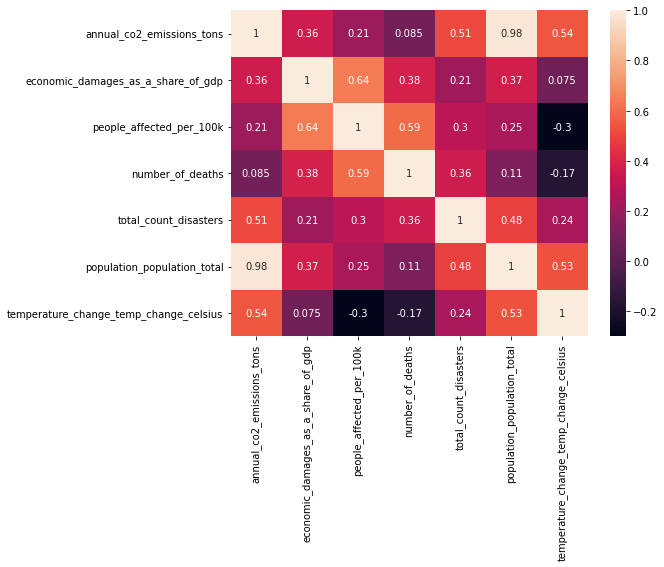

In [14]:
plt.figure(figsize=(8, 6))
sb.heatmap(pak_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [15]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.5817137802322431
Correlación spearman:  0.5287433155080213
Correlación kendall:  0.3939393939393939


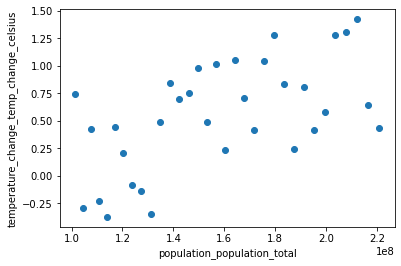

In [16]:
plt.scatter(pak_df.population_population_total , pak_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [145]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  0.5954368345453294
Correlación spearman:  0.5391042780748664
Correlación kendall:  0.4090909090909091


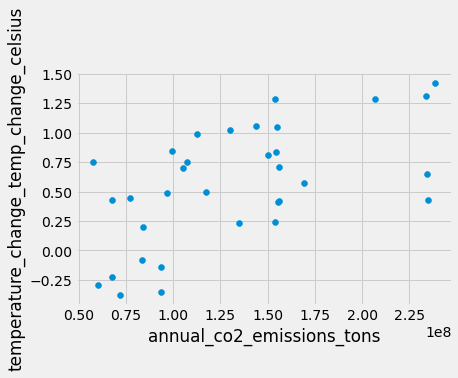

In [146]:
plt.scatter(pak_df.annual_co2_emissions_tons, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [149]:
print('Correlación Pearson: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['total_count_disasters'], method='pearson'))
print('Correlación spearman: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['total_count_disasters'], method='spearman'))
print('Correlación kendall: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['total_count_disasters'], method='kendall'))

Correlación Pearson:  0.023926032860386512
Correlación spearman:  0.21199581886639174
Correlación kendall:  0.14405677285347643


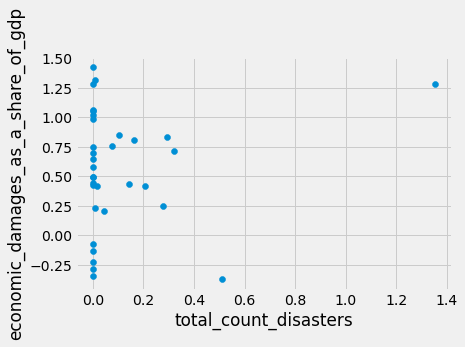

In [150]:
plt.scatter(pak_df.economic_damages_as_a_share_of_gdp, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('total_count_disasters')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [20]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.14131065053806668
Correlación spearman:  0.07526070920005642
Correlación kendall:  0.05601783308279374


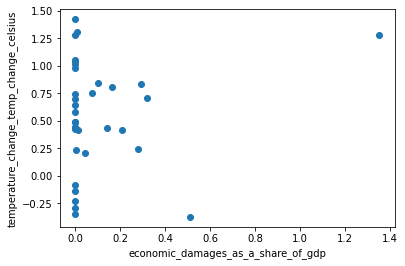

In [21]:
plt.scatter(pak_df.economic_damages_as_a_share_of_gdp, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [22]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [22]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  -0.06930548669175417
Correlación spearman:  -0.1697860962566845
Correlación kendall:  -0.12878787878787878


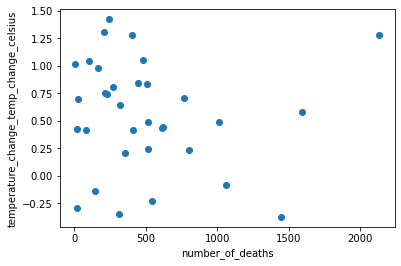

In [23]:
plt.scatter(pak_df.number_of_deaths, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [25]:
# Correlación sin outlier
#Pendiente


In [24]:
print('Correlación Pearson: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.6807077079198364
Correlación spearman:  0.3837586162512311
Correlación kendall:  0.31456167808030333


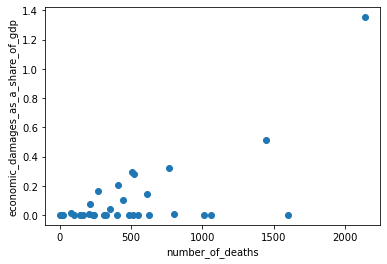

In [25]:
plt.scatter(pak_df.number_of_deaths, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [28]:
# Correlación sin outlier
#Pendiente


In [26]:
print('Correlación Pearson: ',pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.5983510081030363
Correlación spearman:  0.6405269640989485
Correlación kendall:  0.5158497671834821


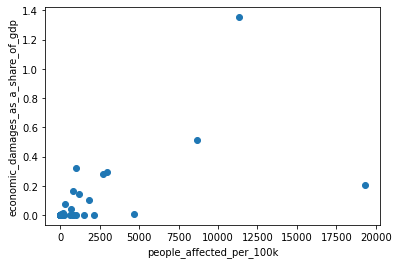

In [27]:
plt.scatter(pak_df.people_affected_per_100k, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [31]:
# Correlación sin outlier
#Pendiente


In [28]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.5817137802322427, p-value=0.00038415364315699937
Correlación Spearman: r=0.5287433155080213, p-value=0.0015594998114863562
Correlación Pearson: r=0.3939393939393939, p-value=0.001046196742286816


## Normalizando una variable 

In [29]:
normalized_ND_2 = pak_df['number_of_deaths']/np.linalg.norm(pak_df['number_of_deaths'])
pak_df = pak_df.assign(normalized_ND_2=normalized_ND_2)
pak_df.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,
1988,57607377,0.000000,0.000000,232.0,2.0,101389603,0.748,0.058235
1989,60316616,0.000000,136.250993,20.0,1.0,104512874,-0.291,0.005020
1990,67827369,0.000000,0.000000,18.0,1.0,107647918,0.426,0.004518
1991,67477105,0.000000,0.000000,547.0,2.0,110778655,-0.226,0.137305
1992,72014921,0.511526,8680.946528,1446.0,2.0,113911126,-0.375,0.362967


In [30]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  -0.06930548669175415
Correlación spearman:  -0.1697860962566845
Correlación kendall:  -0.12878787878787878


In [31]:
normalized_EDPGDP = pak_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(pak_df['economic_damages_as_a_share_of_gdp'])
pak_df = pak_df.assign(normalized_EDPGDP=normalized_EDPGDP)
pak_df.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,
1988,57607377,0.000000,0.000000,232.0,2.0,101389603,0.748,0.058235,0.000000
1989,60316616,0.000000,136.250993,20.0,1.0,104512874,-0.291,0.005020,0.000000
1990,67827369,0.000000,0.000000,18.0,1.0,107647918,0.426,0.004518,0.000000
1991,67477105,0.000000,0.000000,547.0,2.0,110778655,-0.226,0.137305,0.000000
1992,72014921,0.511526,8680.946528,1446.0,2.0,113911126,-0.375,0.362967,0.325985


In [32]:
# Set independent and dependent variables
X = pak_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = pak_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(33,)
Intercept: -0.29242388823135906
Coefficients: [ 4.68338277e-09  4.39171138e-02 -3.06080211e-09]


In [33]:
X = pak_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(pak_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9348
Date:                Thu, 01 Sep 2022   Prob (F-statistic):              0.437
Time:                        18:57:01   Log-Likelihood:                 15.119
No. Observations:                  33   AIC:                            -22.24
Df Residuals:                      29   BIC:                            -16.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [34]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.08817283071769666


In [35]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 0.934757585996558
Probability of observing value at least as high as F-statistic: 0.4365040120353536


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [36]:
print(olsmod.pvalues)

const                                     0.234378
population_population_total               0.151589
temperature_change_temp_change_celsius    0.547367
annual_co2_emissions_tons                 0.170653
dtype: float64


All of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that there variables affects our dependet variable.

## Encoding only two variables

In [38]:
pak_df.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,
1988,57607377,0.000000,0.000000,232.0,2.0,101389603,0.748,0.058235,0.000000
1989,60316616,0.000000,136.250993,20.0,1.0,104512874,-0.291,0.005020,0.000000
1990,67827369,0.000000,0.000000,18.0,1.0,107647918,0.426,0.004518,0.000000
1991,67477105,0.000000,0.000000,547.0,2.0,110778655,-0.226,0.137305,0.000000
1992,72014921,0.511526,8680.946528,1446.0,2.0,113911126,-0.375,0.362967,0.325985


In [39]:
pak_df = pak_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
pak_df.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,57607377,0.000000,0.000000,232.0,2.0,101389603,0.748
1989,60316616,0.000000,136.250993,20.0,1.0,104512874,-0.291
1990,67827369,0.000000,0.000000,18.0,1.0,107647918,0.426
1991,67477105,0.000000,0.000000,547.0,2.0,110778655,-0.226
1992,72014921,0.511526,8680.946528,1446.0,2.0,113911126,-0.375


In [41]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(pak_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'annual_co2_emissions_tons',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius'
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
0,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
2,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
3,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
4,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [42]:
df_scaled.set_index(pak_df.index,inplace = True)
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [43]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   annual_co2_emissions_tons               33 non-null     float64
 1   economic_damages_as_a_share_of_gdp      33 non-null     float64
 2   people_affected_per_100k                33 non-null     float64
 3   number_of_deaths                        33 non-null     float64
 4   total_count_disasters                   33 non-null     float64
 5   population_population_total             33 non-null     float64
 6   temperature_change_temp_change_celsius  33 non-null     float64
dtypes: float64(7)
memory usage: 2.1 KB


### Look at the dependent Variable

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

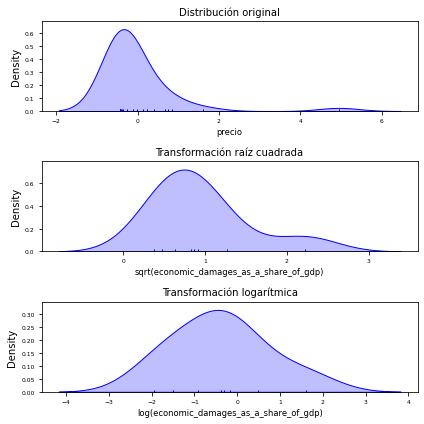

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    df_scaled.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [45]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(df_scaled.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,57.131278,2592.665905,32.097888,inf,0.562936,2.154623e-10
gamma,77.776095,619.229721,38.781299,inf,0.493594,6.040567e-08
chi2,98.267997,546.559649,46.498821,inf,0.563989,1.962279e-10
expon,104.947257,1100.040019,45.172377,inf,0.574076,7.908193e-11
powerlaw,108.272455,409.478761,49.698249,inf,0.553664,4.856922e-10
lognorm,118.370409,1115.342054,52.640793,inf,0.484847,1.147758e-07
exponpow,127.239518,397.705751,55.025125,inf,0.619094,1.017064e-12
logistic,129.497746,1219.632549,52.109160,inf,0.347238,4.642936e-04
norm,134.831200,941.004943,53.441045,inf,0.335758,8.060702e-04
cauchy,143.563998,2547.151621,55.512036,inf,0.487301,9.600538e-08


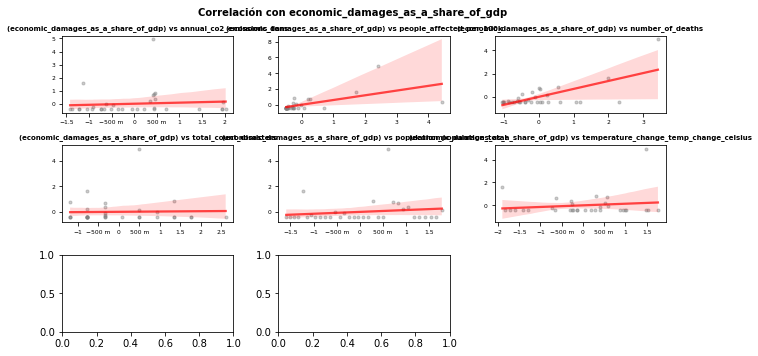

In [48]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('economic_damages_as_a_share_of_gdp')

for i, colum in enumerate(columnas_numeric):
    sb.regplot(
        x           = df_scaled[colum],
        y           = df_scaled['economic_damages_as_a_share_of_gdp'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"(economic_damages_as_a_share_of_gdp) vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con economic_damages_as_a_share_of_gdp', fontsize = 10, fontweight = "bold");

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### ROBUST MODELS

# NOTA:Como puedo graficar estos modelos ?
Entiendo que no puedo usar el scatter porque solo usa dos variables.

### linear regression on a dataset with outliers

In [49]:
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [50]:
df_scaled.set_index(pak_df.index,inplace = True)
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [51]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
#pyplot.scatter(X, y)
#pyplot.show()

(33, 6) (33,)


In [52]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)


#PREGUNTA: SEPUEDE GRAFICAR ESTA RELACION PARA MULTIPLES VARIABLES EXOGENAS?
# CREO QUE SOLO SE PUEDEN GRAFICAR LOS RESIDUALES

#plt.scatter(y, y_line)
#plt.plot(y, y_line, 'r')
#plt.title('Best fit line using regression method')
#plt.xlabel('x-axis')
#plt.ylabel('y-axis')

#plt.show()

Mean MAE: 0.705 (0.562)
The parameters of the line: [ 0.20563423  0.40295495  0.58907856 -0.18878998 -0.25796801  0.29641966]


### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

Mean MAE: 0.651 (0.603)


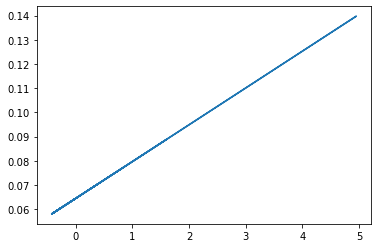

In [53]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)

# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

#plot the line of best fit
plot_best_fit(y, y_pred, model)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

Mean MAE: 1.943 (5.084)


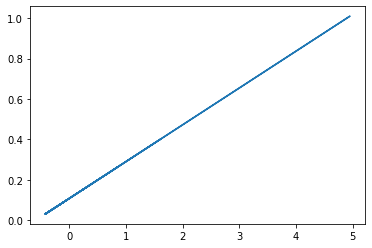

In [54]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()

# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

#plot the line of best fit
plot_best_fit(y, y_pred, model)



### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

(33, 6)
(33,)
Mean MAE: 0.460 (0.416)


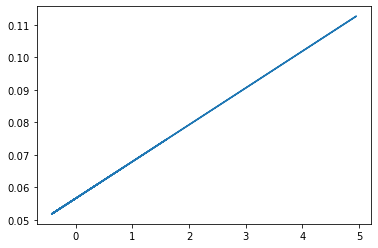

In [55]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)

 
# load dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
plot_best_fit(y, y_pred, model)

### Comparison

>Linear 0.705 (0.562)
>Huber 0.651 (0.603)
>RANSAC 1.691 (4.240)
>TheilSen 0.463 (0.417)


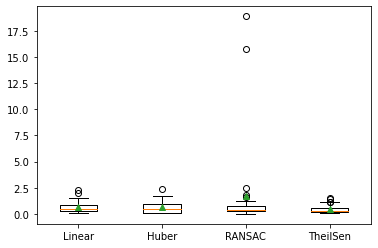

In [57]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

# NOTA: Como puedo graficar las  lineas de regresion en un modelo multivariado?

### Training and testing the linear regression model

In [58]:
df_scaled.set_index(pak_df.index,inplace = True)
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [59]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

In [60]:

# Set independent and dependent variables
X = df_scaled[[
 'annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

In [61]:
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [62]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [63]:
X_train.index

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012],
           dtype='int64', name='year')

In [64]:
X_test.index

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [65]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [66]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [67]:
print(Y_pred_multiple)
print(y_test)

[-0.05091035  5.05868815  0.22385823  0.09407175  0.60691906  0.8419216
  0.32050652  0.42050073]
year
2013    0.220850
2014    0.396901
2015   -0.423702
2016   -0.423356
2017   -0.388165
2018   -0.424069
2019   -0.424069
2020    0.141441
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [68]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 0.61208729  1.12987188  0.24612522 -0.19153309 -0.40606695  0.27923948]
Valor de la intersección o coeficiente "b":
0.2678704438604414


In [69]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.8617149408307295


In [70]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.862
Model:                                            OLS   Adj. R-squared:                  0.816
Method:                                 Least Squares   F-statistic:                     18.69
Date:                                Thu, 01 Sep 2022   Prob (F-statistic):           7.80e-07
Time:                                        19:05:09   Log-Likelihood:                -13.764
No. Observations:                                  25   AIC:                             41.53
Df Residuals:                                      18   BIC:                             50.06
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [71]:
print(modelo.pvalues)

const                                     0.060047
annual_co2_emissions_tons                 0.552831
people_affected_per_100k                  0.000629
number_of_deaths                          0.199465
total_count_disasters                     0.180886
population_population_total               0.647009
temperature_change_temp_change_celsius    0.039471
dtype: float64


In [72]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.012582,0.548323
annual_co2_emissions_tons,-1.513989,2.738163
people_affected_per_100k,0.555042,1.704702
number_of_deaths,-0.142066,0.634317
total_count_disasters,-0.480612,0.097546
population_population_total,-2.237926,1.425792
temperature_change_temp_change_celsius,0.015021,0.543458


In [73]:
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


### Complete model without split

In [74]:
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 9.712315351232988e-18
Coefficients: [ 0.20563423  0.40295495  0.58907856 -0.18878998 -0.25796801  0.29641966]


## Model Validation

In [75]:
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.659
Model:                                            OLS   Adj. R-squared:                  0.580
Method:                                 Least Squares   F-statistic:                     8.364
Date:                                Thu, 01 Sep 2022   Prob (F-statistic):           4.18e-05
Time:                                        19:05:38   Log-Likelihood:                -29.086
No. Observations:                                  33   AIC:                             72.17
Df Residuals:                                      26   BIC:                             82.65
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [76]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.6587327381356001


In [77]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 8.364437058293484
Probability of observing value at least as high as F-statistic: 4.177134468380191e-05


In [78]:
print(olsmod_scaled.pvalues)

const                                     1.000000
annual_co2_emissions_tons                 0.689832
people_affected_per_100k                  0.008662
number_of_deaths                          0.000171
total_count_disasters                     0.181782
population_population_total               0.619891
temperature_change_temp_change_celsius    0.052094
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Modelo OLS

In [79]:
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 9.712315351232988e-18
Coefficients: [ 0.20563423  0.40295495  0.58907856 -0.18878998 -0.25796801  0.29641966]


In [80]:
X = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.659
Model:                                            OLS   Adj. R-squared:                  0.580
Method:                                 Least Squares   F-statistic:                     8.364
Date:                                Thu, 01 Sep 2022   Prob (F-statistic):           4.18e-05
Time:                                        19:06:09   Log-Likelihood:                -29.086
No. Observations:                                  33   AIC:                             72.17
Df Residuals:                                      26   BIC:                             82.65
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [81]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.6587327381356001


In [82]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 8.364437058293484
Probability of observing value at least as high as F-statistic: 4.177134468380191e-05


In [83]:
print(olsmod_scaled.pvalues)

const                                     1.000000
annual_co2_emissions_tons                 0.689832
people_affected_per_100k                  0.008662
number_of_deaths                          0.000171
total_count_disasters                     0.181782
population_population_total               0.619891
temperature_change_temp_change_celsius    0.052094
dtype: float64


In [84]:
df_scaled['residual'] = olsmod_scaled.resid

In [85]:
df_scaled['predictions'] = olsmod_scaled.predict(X)

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


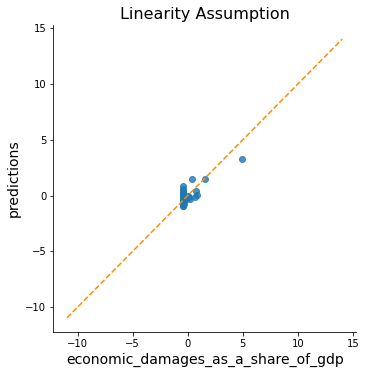

In [86]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point dont spread around the diagonal line, so we can assume that there isnt linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.2761249491820753


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


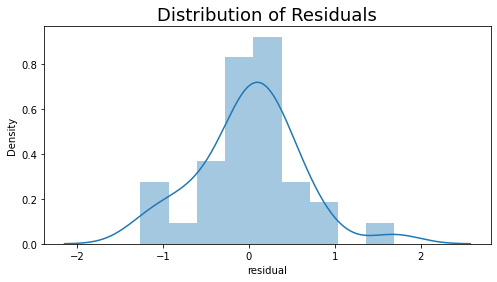

Residuals are normally distributed


In [87]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                         annual_co2_emissions_tons  \
annual_co2_emissions_tons                                1.000000   
people_affected_per_100k                                 0.069350   
number_of_deaths                                         0.021686   
total_count_disasters                                    0.481603   
population_population_total                              0.967943   
temperature_change_temp_change_celsius                   0.595437   

                                        people_affected_per_100k  \
annual_co2_emissions_tons                               0.069350   
people_affected_per_100k                                1.000000   
number_of_deaths                                        0.436827   
total_count_disasters                                   0.018974   
population_population_total                             0.178761   
temperature_change_temp_change_celsius           

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


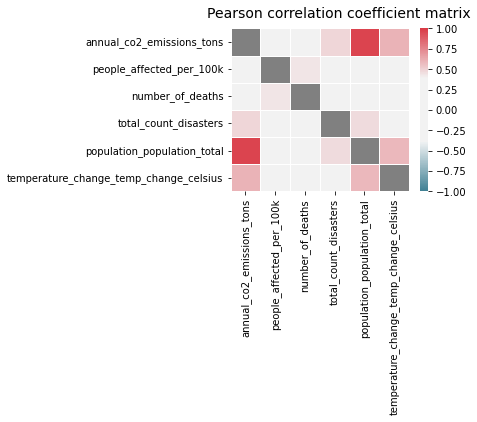

In [89]:
corr = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [90]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.6957356389420146
Little to no autocorrelation 

Assumption satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

In [91]:
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius,residual,predictions
year,,,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779,-0.274351,-0.149718
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250,0.533373,-0.957443
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626,0.109905,-0.533974
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746,-0.044984,-0.379085
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487,0.085539,1.524461


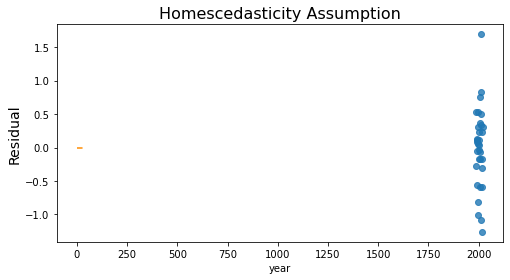

In [92]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year')
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Theil Sen Model: selected by the MAE criteria

In [93]:
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius,residual,predictions
year,,,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779,-0.274351,-0.149718
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250,0.533373,-0.957443
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626,0.109905,-0.533974
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746,-0.044984,-0.379085
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487,0.085539,1.524461


In [94]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[[
 'annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[[
 'annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

#from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train.index




Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012],
           dtype='int64', name='year')

In [95]:
X_test.index

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [96]:
# define the model
model = TheilSenRegressor()

#Entreno el modelo
model_th = model.fit(X_train, y_train)

#Realizo una predicción
Y_pred = model_th.predict(X_test)


# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
#plot_best_fit(X, y_pred, model)

Mean MAE: 0.475 (0.326)


In [97]:
def mape(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape(y_test, y_pred.reshape(-1,1))

98.56366963171948

In [98]:
print(Y_pred)
print(y_test)

[ 0.00965637  3.95514952  0.07344736 -0.37290771 -0.30052667 -0.18533158
 -0.14320332 -0.10994848]
year
2013    0.220850
2014    0.396901
2015   -0.423702
2016   -0.423356
2017   -0.388165
2018   -0.424069
2019   -0.424069
2020    0.141441
Name: economic_damages_as_a_share_of_gdp, dtype: float64


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


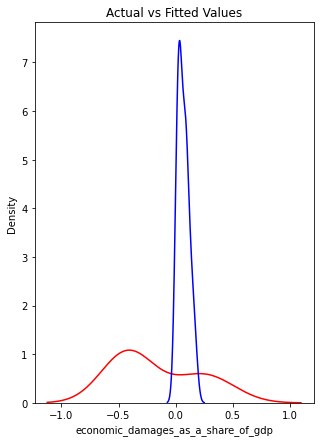

In [99]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [100]:
print('Intercept:', model_th.intercept_)
print('Coefficients:', model_th.coef_)

Intercept: 0.07025984242141506
Coefficients: [-0.14872108  0.85536532  0.11647809 -0.09615544  0.18110534  0.09903782]


In [101]:
print('Precisión del modelo:')
print(model_th.score(X_train, y_train))

Precisión del modelo:
0.7543801814096771


## Modelo DISCRETO: Random Forest 


In [102]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import svm

In [103]:
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius,residual,predictions
year,,,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779,-0.274351,-0.149718
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250,0.533373,-0.957443
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626,0.109905,-0.533974
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746,-0.044984,-0.379085
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487,0.085539,1.524461


In [104]:
df_scaled=df_scaled.drop(['residual', 'predictions'],axis=1)
df_scaled.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [105]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

In [106]:
# Set independent and dependent variables
X = df_scaled[[
 'annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

In [118]:
# Set independent and dependent variables
#y = np.array(df_scaled['economic_damages_as_a_share_of_gdp'])
#X = df_scaled.drop(['economic_damages_as_a_share_of_gdp'],axis=1)

In [107]:
feature_list = list(X.columns)
feature_list

['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']

In [108]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [109]:
# Use the train_test_split function to create training and testing subsets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

#print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
#print('X_test shape:', X_test.shape)
#print('y_test shape:', y_test.shape)

In [110]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (25, 6)
y_train shape: (25,)
X_test shape: (8, 6)
y_test shape: (8,)


In [111]:
X_train.index

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012],
           dtype='int64', name='year')

In [112]:
X_test.index

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

# Duda 1: Esta bien establecido mi baseline predictions?
# Duda 2: Para el error promedio de linea base se utiliza el baseline predictions?
# Duda 3: Quisieramos saber como lograr un orden en el tree para la interpretacion del modelo!!
orden para saber que salga en orden la interpretacion, es dcir, para tener una linea de seguimiento en el arbol, es decir que mi variable seed sea people affected per 100k y mi variable final sea Economic damages as share GDP, se requiere algun orden especifico en la entrada de mis variables? o como le puedo hacer??

En el caso de este modelo me limité a hacer un arbol de tres niveles de profundidad y me muestra variables que no consideré en el modelo final "New random forest with only the two most important variables". Por que?????
Ver el diagrama de arbol en small_tree en el indice general de mis notebook hasta abajo.

# Duda 4: Como seria un ejemplo de interpretacion de los resultados del diagrama? Tengo una ligera idea pero no estoy segura si lo entiendo bien.

# Duda5: Acerca del problema de series de tiempo, en este modelo como puedo tratar el tipo de series que tengo de manera que no ignore el tiempo. 

Es que tenemos series de datos tipo discreto por la cantidad de ceros que tenemos pero tenemos el tiempo como orden de la informacion. Jime nos comento que el split se puede hacer para series de tiempo, hay alguna otra cosa que se debe considerar?



# Duda 6. Para la optimizacion de hiperparametros se usa Out of bag pero lei que es para datos no temporales, cual seria para datos temporales???

In [113]:
# The baseline predictions 
baseline_preds = y_train

print('Error promedio de línea base: ', round(np.mean(baseline_preds), 2))

Error promedio de línea base:  0.05


In [114]:
from sklearn.ensemble import RandomForestRegressor
# Crear una instancia del modelo con 1000 árboles de decisión 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenar el modelo con datos de entrenamiento 
rf.fit(X_train, y_train);

In [115]:
# Usar el método de predicción del bosque en las 
predictions= rf.predict(X_test)

In [116]:
print('Precisión del modelo:')
print(rf.score(X_train, y_train))

Precisión del modelo:
0.9144061779559063


In [117]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5
print(mse)
print(rmse)

2.425178113659496
1.5572983380391492


In [118]:
df_RFpred=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_RFpred.head()

,Actual,Predicted
year,,
2013,0.220850,0.373229
2014,0.396901,1.532588
2015,-0.423702,0.850856
2016,-0.423356,1.835732
2017,-0.388165,1.792290


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


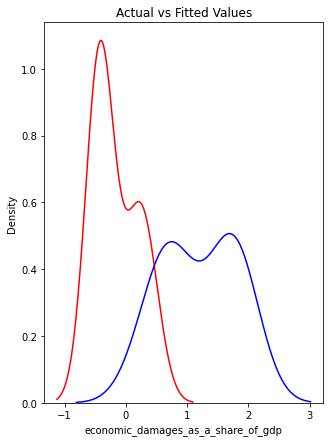

In [119]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [120]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.3678243029849282
Mean Squared Error: 2.425178113659496
Root Mean Squared Error: 1.5572983380391492


In [121]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.37 
Accuracy: 282.72 %.


In [122]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: temperature_change_temp_change_celsius Importance: 0.3
Variable: people_affected_per_100k Importance: 0.28
Variable: number_of_deaths     Importance: 0.21
Variable: population_population_total Importance: 0.12
Variable: annual_co2_emissions_tons Importance: 0.08
Variable: total_count_disasters Importance: 0.01


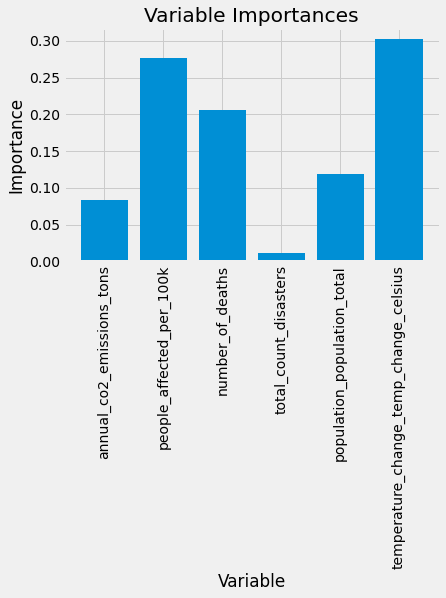

In [123]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


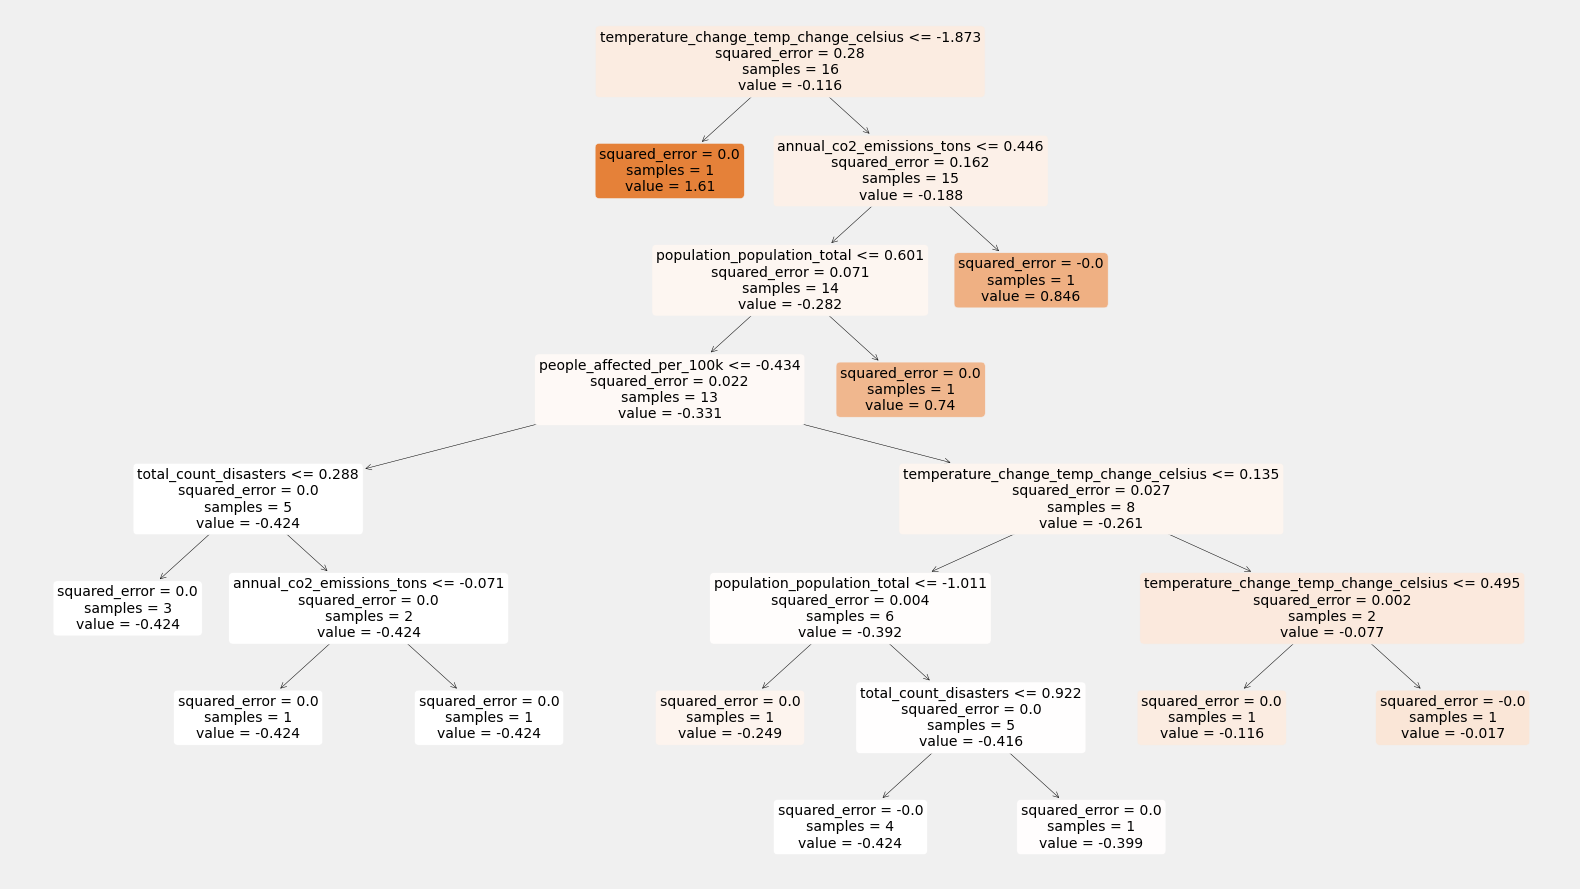

In [124]:
import pydot
# Pull out one tree from the forest
Tree = rf.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True,
              feature_names = feature_list,
              rounded=True, 
              fontsize=14);




## Optimizacion de hiperparametros

#### Estimators number selection

En Random Forest, el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejorar el resultado. En Random Forest no se produce overfitting por exceso de árboles. Sin embargo, añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales.

In [125]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\Laura\anaconda3\envs\mlenv\li

Valor óptimo de n_estimators: 51


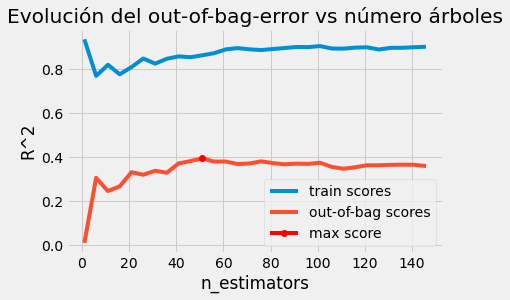

In [126]:
# Validación empleando el Out-of-Bag error

train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

Valor óptimo de n_estimators: 41


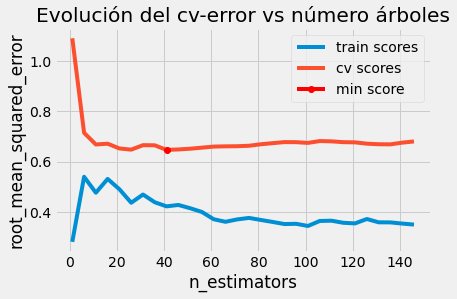

In [127]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error

train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Ambas métricas indican que, entre 6 y 11  árboles, el error de validación del modelo se estabiliza.

#### Max features validation
El valor de máx_features es uno de los hiperparámetros más importantes de random forest, ya que es el que permite controlar cuánto se decorrelacionan los árboles entre sí.

OUT OF BAG NO APLICA EN SERIES TEMPORALES

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

Valor óptimo de max_features: 4


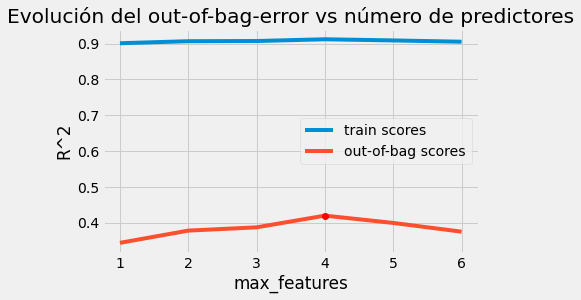

In [128]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Valor óptimo de max_features: 4


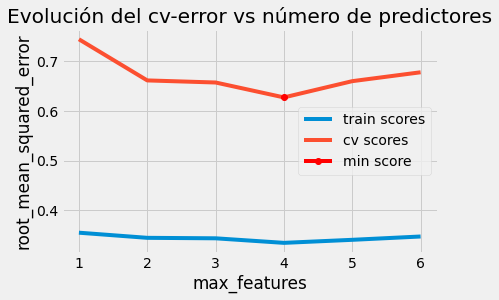

In [129]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Acorde a las dos métricas utilizadas, el valor óptimo de max_features está en .

#### Grid Search
Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás.

In [143]:
# Grid de hiperparámetros evaluados
# ==============================================================================
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
1,0.390317,3.0,5.0,150.0
0,0.384512,NaN,5.0,150.0
2,0.384512,10.0,5.0,150.0
3,0.384512,20.0,5.0,150.0


In [130]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

#### Grid Search basado en validación cruzada


In [131]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,None,5,150,-0.678771,0.674455,-0.321553,0.077642
2,10,5,150,-0.678771,0.674455,-0.321553,0.077642
3,20,5,150,-0.678771,0.674455,-0.321553,0.077642
1,3,5,150,-0.681669,0.672459,-0.331135,0.079569


In [132]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 5, 'n_estimators': 150} : -0.6787707408555049 neg_root_mean_squared_error


In [133]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.2820483799819553


In [134]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_scaled.drop(columns = 'economic_damages_as_a_share_of_gdp').columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,people_affected_per_100k,0.381840
2,number_of_deaths,0.219662
5,temperature_change_temp_change_celsius,0.204766
0,annual_co2_emissions_tons,0.103168
4,population_population_total,0.072477
3,total_count_disasters,0.018087


In [135]:
from sklearn.inspection import permutation_importance
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
1,0.344919,0.125231,people_affected_per_100k
2,0.222118,0.104542,number_of_deaths
5,0.183370,0.087629,temperature_change_temp_change_celsius
0,0.063736,0.013951,annual_co2_emissions_tons
4,0.045756,0.007661,population_population_total
3,0.005682,0.004480,total_count_disasters


In [136]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 3, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temperature_change_temp_change_celsius'),feature_list.index('people_affected_per_100k'), feature_list.index('number_of_deaths')]

train_important = X_train.values[:,important_indices]
test_important = X_test.values[:,important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), '')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 0.5 
Accuracy: 74.29 %.


In [137]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.49772348210963646
Mean Squared Error: 0.500330983669771
Root Mean Squared Error: 0.7073407832648779


In [138]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.5 
Accuracy: 74.29 %.


In [139]:
# Error de test del modelo modificado
# ==============================================================================
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.7073407832648779


In [140]:
df_RFpred_mod=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_RFpred_mod.head()

,Actual,Predicted
year,,
2013,0.220850,-0.218953
2014,0.396901,1.745264
2015,-0.423702,0.677366
2016,-0.423356,-0.424069
2017,-0.388165,-0.424069


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


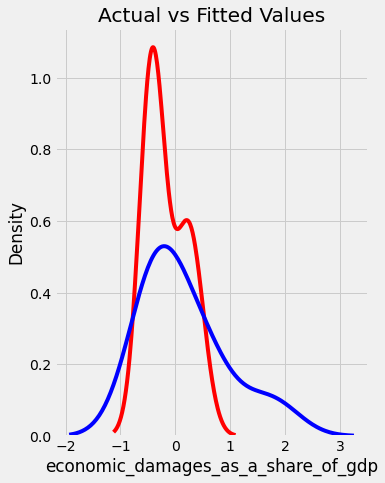

In [141]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [142]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
import pydot


[Text(0.6666666666666666, 0.875, 'population_population_total <= 0.5\nsquared_error = 1.2\nsamples = 18\nvalue = -0.1'),
 Text(0.5, 0.625, 'people_affected_per_100k <= 1.2\nsquared_error = 0.2\nsamples = 17\nvalue = -0.3'),
 Text(0.3333333333333333, 0.375, 'people_affected_per_100k <= -0.4\nsquared_error = 0.0\nsamples = 16\nvalue = -0.4'),
 Text(0.16666666666666666, 0.125, 'squared_error = 0.0\nsamples = 10\nvalue = -0.4'),
 Text(0.5, 0.125, 'squared_error = 0.0\nsamples = 6\nvalue = -0.3'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.6'),
 Text(0.8333333333333334, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 5.0')]

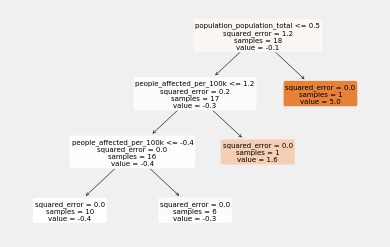

In [143]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=6, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
tree.plot_tree(tree_small, filled=True, feature_names = feature_list, rounded = True, precision = 1, fontsize=7)

In [158]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=6, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


# MIL GRACIAS!!!!!

ref. https://www.cienciadedatos.net/documentos/py08_random_forest_python.html